# US Health Insurance
- Andrea Cohen
- 03.09.2023

## Data:
Source - 
- https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Content -
- This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

## Preliminary Steps

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in the data
df = pd.read_csv('Data/insurance - insurance.csv')
display(df.head())
display(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

## Q1. Do smokers have higher insurance charges than non-smokers?

In [8]:
# split data into 2 groups
smoker_df = df.loc[df['smoker'] == 'yes'].copy()
display(smoker_df.head())
display(smoker_df.info())
no_smoker_df = df.loc[df['smoker'] == 'no'].copy()
display(no_smoker_df.head())
display(no_smoker_df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


None

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


None

In [9]:
# define the feature of interest
smoker_charges = smoker_df['charges']
no_smoker_charges = no_smoker_df['charges']

### State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no significant difference between the charges of smokers vs non-smokers.

- Alternate Hypothesis: There is a significant difference between the charges of smokers vs non-smokers.

- Significance Level (Alpha): Alpha value is 0.05.

### Select the correct test according to the data type and number of samples

In [10]:
df['charges'].dtype

dtype('float64')

In [11]:
display(smoker_df.info())
display(no_smoker_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


None

- Because the target data are numeric and there are 2 groups, the test will be an Independent (2-Sample) T-Test.

### Test the assumptions of your selected test.

#### Test for outliers

In [12]:
# check for outliers
zscores1= stats.zscore(smoker_charges)
outliers1 = abs(zscores1) > 3
np.sum(outliers1)

0

In [13]:
# check for outliers
zscores2= stats.zscore(no_smoker_charges)
outliers2 = abs(zscores2) > 3
np.sum(outliers2)

24

In [14]:
# remove outliers
no_smoker_charges = no_smoker_charges[(np.abs(stats.zscore(no_smoker_charges)) < 3)]

#### Test for normality

In [16]:
# check for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

- The p-value is > 0.05, so there is no statistical difference between the distribution and a normal distribution.


In [17]:
# check for normality
result_no_smoker_charges = stats.normaltest(no_smoker_charges)
result_no_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- The p-value is > 0.05, so there is no statistical difference between the distribution and a normal distribution.

#### Test for equal variance

In [18]:
# check for equal variance
result1 = stats.levene(smoker_charges, no_smoker_charges)
result1

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- The p-value is > 0.05, so there is no statistical difference between the variances of the 2 samples.

### Execute the selected test

In [19]:
# Independent t-test
result2 = stats.ttest_ind(smoker_charges, no_smoker_charges)
result2

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)

### Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is < 0.05, so reject the null hypothesis. There is a significant difference between groups.
- Smokers have different insurance charges than non-smokers.

### Show a supporting visualization that helps display the result

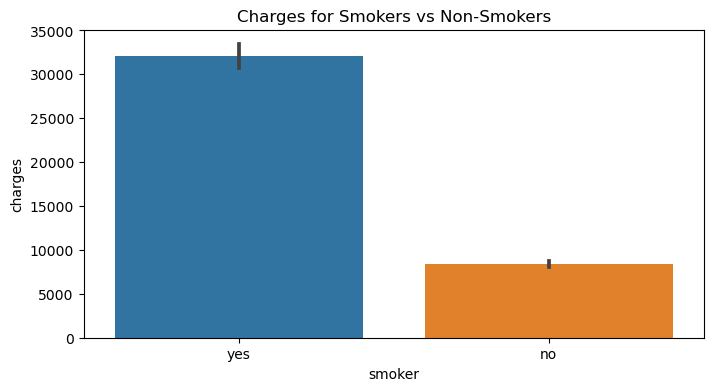

In [30]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.barplot(data = df, x = 'smoker', y = 'charges')
plt.title('Charges for Smokers vs Non-Smokers');

## Q2. Are men more likely to smoke than women?

### State your Null Hypothesis and Alternative Hypothesis



### Select the correct test according to the data type and number of samples


### Test the assumptions of your selected test.


### Execute the selected test, or the alternative test (if you do not meet the assumptions)


### Interpret your p-value and reject or fail to reject your null hypothesis


### Show a supporting visualization that helps display the result

## Q3. Do different regions have different charges, on average?

### State your Null Hypothesis and Alternative Hypothesis


### Select the correct test according to the data type and number of samples


### Test the assumptions of your selected test.


### Execute the selected test, or the alternative test (if you do not meet the assumptions)


### Interpret your p-value and reject or fail to reject your null hypothesis


### Show a supporting visualization that helps display the result